# License Plate Detection using OpenCV and Haar Cascade Classifier

**Name  :** KISHORE S
**Reg No:** 212224230130
**Slot  :** 4E6-1

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('input.jpg')

In [3]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

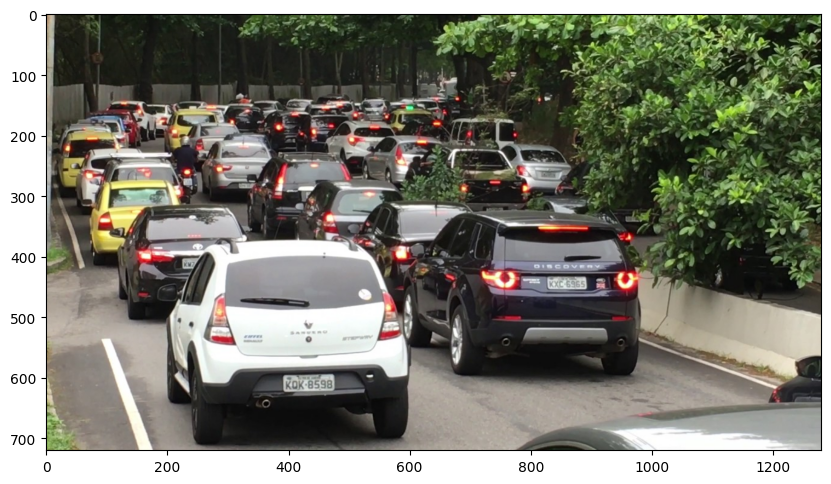

In [4]:
display(img)

In [5]:
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

In [6]:
def detect_plates(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.1,minNeighbors=3)
    print(f"Total license plates detected: {len(plate_rects)}")
    for (x, y, w, h) in plate_rects:
        cv2.rectangle(plate_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return plate_img

In [7]:
result = detect_plates(img)

Total license plates detected: 2


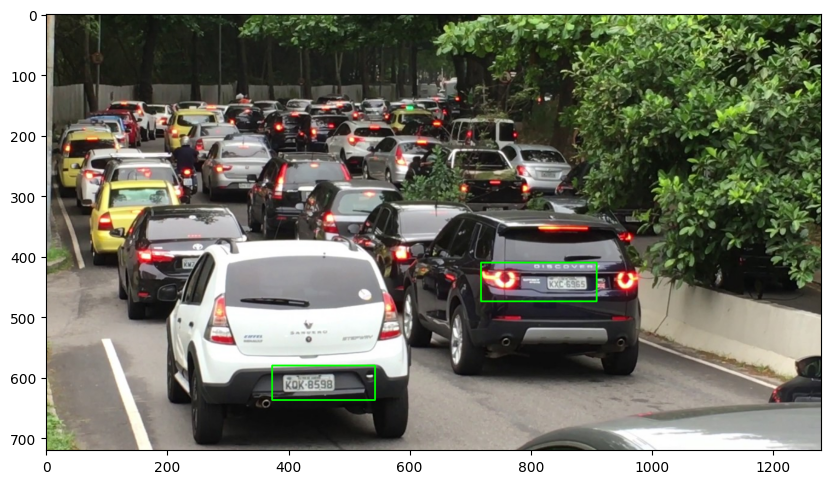

In [8]:
display(result)

In [9]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.1,minNeighbors=4)
    for (x, y, w, h) in plate_rects:
        if w > 0 and h > 0 and y+h <= plate_img.shape[0] and x+w <= plate_img.shape[1]:
            roi = plate_img[y:y+h, x:x+w]
            blurred_roi = cv2.medianBlur(roi,15)
            plate_img[y:y+h,x:x+w] = blurred_roi
    return plate_img

In [10]:
result = detect_and_blur_plate(img)

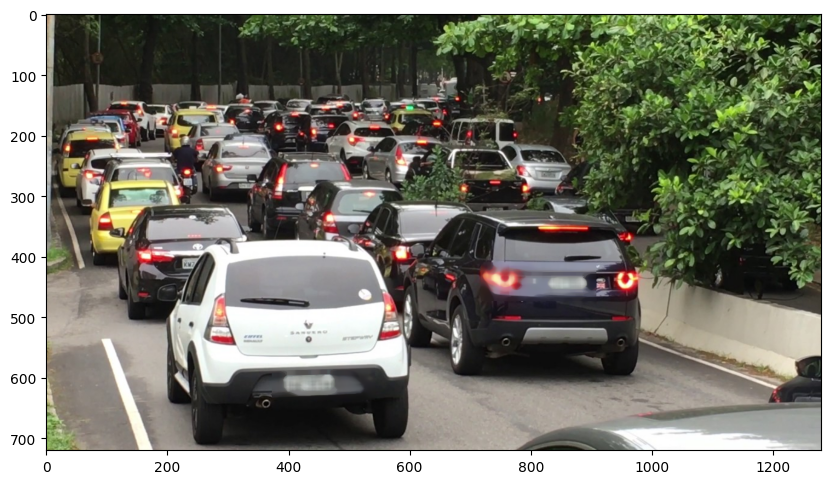

In [11]:
display(result)